### ``image_dataset_from_directory`` function

```
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    smart_resize=False,
)
```
> Generates a ``tf.data.Dataset`` from image files in a directory.

Right now i have a dirictory called ``data``. In this directory I have two folders called `ants` and `bees`. The structure looks as follows:

```
data-
    ants- ant1.png
        - ant2.png
        - ...
    bees - bee1.png
         - bee2.png
         - ...
```

### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
directory = 'data'

In [57]:
ds = keras.preprocessing.image_dataset_from_directory(
    directory = directory, # path to images
    labels="inferred",
    label_mode="categorical", # categorical[sparse_categorical_crossentropy], int [sparse_categorical_crossentropy],  'binary'[binary_crossentropy]
    class_names=None,
    color_mode="rgb", #  "grayscale", "rgb", "rgba".
    batch_size=10,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None, # a fraction number between 0 and 1
    subset=None, # training, validation if and only if the validation_split is set.
    interpolation="nearest", # bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.
    follow_links=False,
)

Found 84 files belonging to 2 classes.


In [58]:
for image, label in ds:
    print(image, label)
    break

tf.Tensor(
[[[[  0   1   0]
   [  0   1   0]
   [  0   1   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   1   0]
   [  0   1   0]
   [  0   1   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   1   0]
   [  0   1   0]
   [  0   1   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[234 174 120]
   [230 171 115]
   [230 171 115]
   ...
   [ 96  88  69]
   [ 96  88  69]
   [213 208 188]]

  [[234 174 120]
   [230 171 115]
   [230 171 115]
   ...
   [ 96  88  69]
   [ 96  88  69]
   [213 208 188]]

  [[233 173 119]
   [229 170 114]
   [229 170 114]
   ...
   [126 118  97]
   [126 118  97]


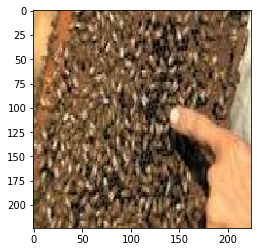

In [59]:
plt.imshow(image[1])

In [62]:
image.shape

TensorShape([10, 224, 224, 3])

#### ``load_img`` function
Loads an image into PIL format.
```
tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)
```

In [35]:
path = 'data/bees/bee1.png'

In [68]:
image = keras.preprocessing.image.load_img(
    path, color_mode='rgb', target_size=(200, 200)
)

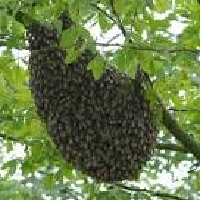

In [72]:
image

#### ``img_to_array`` function
Converts a PIL Image instance to a Numpy array.
````
tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
````


In [83]:
img_array = keras.preprocessing.image.img_to_array(image, dtype=np.float32,
                                                  data_format="channels_last" # "channels_first"
                                                  )
print(img_array)

[[[153. 183. 109.]
  [132. 162.  88.]
  [132. 162.  88.]
  ...
  [ 52.  77.   0.]
  [ 52.  77.   0.]
  [ 46.  70.   0.]]

 [[103. 133.  61.]
  [120. 150.  76.]
  [120. 150.  76.]
  ...
  [ 86. 112.  25.]
  [ 86. 112.  25.]
  [ 31.  56.   0.]]

 [[103. 133.  61.]
  [120. 150.  76.]
  [120. 150.  76.]
  ...
  [ 86. 112.  25.]
  [ 86. 112.  25.]
  [ 31.  56.   0.]]

 ...

 [[ 99. 138.  73.]
  [110. 149.  82.]
  [110. 149.  82.]
  ...
  [195. 218. 190.]
  [195. 218. 190.]
  [222. 245. 217.]]

 [[ 99. 138.  73.]
  [110. 149.  82.]
  [110. 149.  82.]
  ...
  [195. 218. 190.]
  [195. 218. 190.]
  [222. 245. 217.]]

 [[102. 141.  74.]
  [113. 153.  83.]
  [113. 153.  83.]
  ...
  [145. 168. 142.]
  [145. 168. 142.]
  [186. 209. 183.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


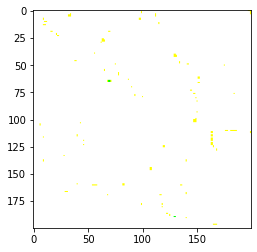

In [80]:
plt.imshow(img_array)

### ``ImageDataGenerator`` class
* Generate batches of tensor image data with real-time data augmentation.
[Docs](https://keras.io/api/preprocessing/image/)
```
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
```

### ``.flow_from_directory(directory):``

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

>  The stusture of the directory should normaly look like this. And this allows us to create datagerators for both, train , tets and validation sets.

```
data-
    train -
        -img1
        -img2
        -img3
        -...
    test -
        -img1
        -img2
        -img3
        -...
    validation -
        -img1
        -img2
        -img3
        -...
```

> **How?**
Suppose we have the structure as shown above. We may want to create `generators` for all the splits `train`, `test` and `validation` we can do it as follows:

```python
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)
### Creating generators
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(224, 224),
)
validation_generator = validation_datagen.flow_from_directory(
        'data/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
)
```
> Pass the generators to the model in the ``fit``

[Read the Docs](https://keras.io/api/preprocessing/image/)

In [88]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

In [94]:
train_generator = train_datagen.flow_from_directory(
        'data',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
)

Found 84 images belonging to 2 classes.


In [103]:
for data, i in train_generator:
    break

In [104]:
data[0].shape
i

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1.], dtype=float32)

> Let's create a model that will train on the dataset given above.

In [105]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics = ['acc']
)
model_2.fit(train_generator, epochs=2)

Epoch 1/2
3/3 [==============================] - 7s 1s/step - loss: 0.8710 - acc: 0.5215
Epoch 2/2
3/3 [==============================] - 4s 1s/step - loss: 1.0037 - acc: 0.4922


> Evalutaing the model

In [106]:
model_2.evaluate(train_generator)

3/3 [==============================] - 3s 742ms/step - loss: 0.6181 - acc: 0.7143


[0.6181352734565735, 0.7142857313156128]

In [118]:
for data_, labels in train_generator:
    break

In [119]:
labels

array([0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [121]:
tf.reshape(tf.round(model_2.predict(data_)), shape=(1, -1)) , labels

(<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
 array([[1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.]],
       dtype=float32)>,
 array([0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       dtype=float32))

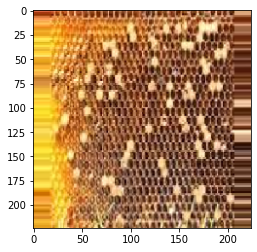

In [122]:
plt.imshow(data_[1])

### `flow` method
Takes data & label arrays, generates batches of augmented data.
```python
ImageDataGenerator.flow(
    x,
    y=None,
    batch_size=32,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
)
```
> Returns An Iterator yielding tuples of (x, y) where x is a numpy array of image data (in the case of a single image input) or a list of numpy arrays (in the case with additional inputs) and y is a numpy array of corresponding labels. If 'sample_weight' is not None, the yielded tuples are of the form (x, y, sample_weight). If y is None, only the numpy array x is returned.

In [146]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
img = load_img('data/bees/bee4.png')
data = img_to_array(img)
data  = data.reshape((1,) + data.shape)
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

i = 0;
for _ in datagen.flow(data,
    y=None,
    batch_size=1,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir='data/generated',
    save_prefix="bee",
    save_format="jpeg",
    subset="training"):
    i+=1
    if i == 2:
        break
print("Saved")

Saved


In [131]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [132]:
x_train.shape

(60000, 28, 28)